_author_: **Yasharth Sharma**

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

Reading the IBM dataset for job satisfaction

In [2]:
data0 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data0.info()
df=data0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Using label encoder on all the categorical 

In [3]:
from sklearn.preprocessing import LabelEncoder
categorical = [
'BusinessTravel',
"Attrition",
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'StockOptionLevel',
 'WorkLifeBalance',
 'RelationshipSatisfaction',
 'PerformanceRating']
for c in categorical:
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [4]:
data1=df
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
target=['JobSatisfaction']
datay=data1[target]
datax=data1.drop(target,axis=1)
additional = ['EmployeeNumber','EmployeeCount','Attrition','StandardHours','DailyRate','JobSatisfaction','Over18',"HourlyRate","MonthlyRate"]
datax=data1.drop(additional,axis=1)


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(datax,datay,test_size=0.2)
dtree_model = RandomForestClassifier().fit(X_train, y_train)
# dtree_predictions = dtree_model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


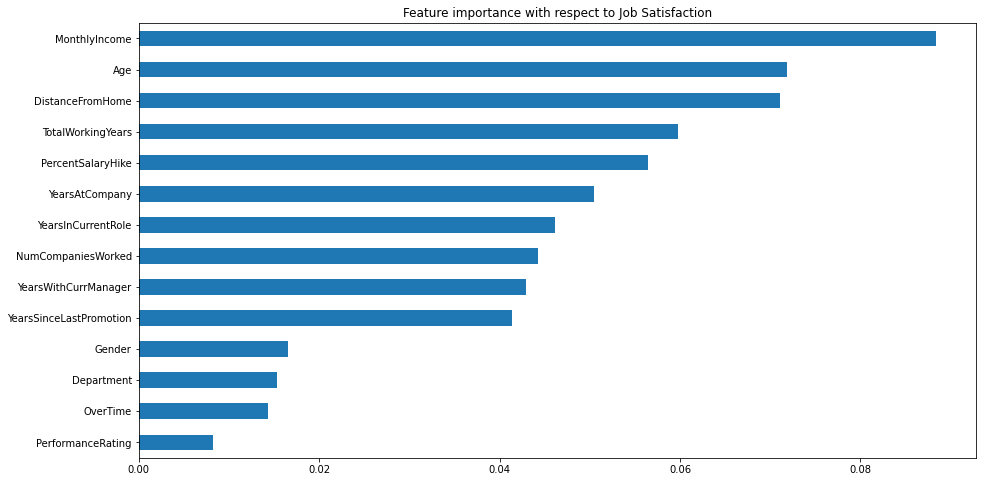

In [7]:
series1 = (pd.Series(dtree_model.feature_importances_, index=X_train.columns)
   .nlargest(10))
series2 = (pd.Series(dtree_model.feature_importances_, index=X_train.columns)
   .nsmallest(4))[::-1]
(pd.concat([series1, series2])
.plot(kind='barh',title="Feature importance with respect to Job Satisfaction",figsize=(15,8)).invert_yaxis())

plt.savefig('Job_Satisfaction_Feature_Importance.png')

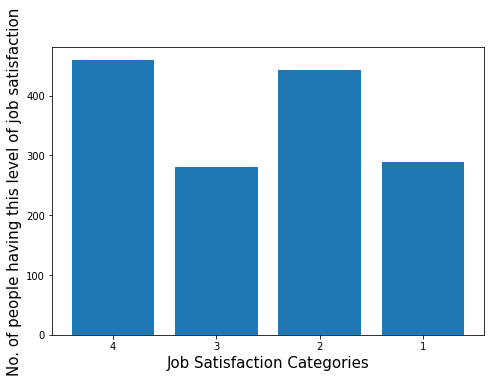

In [8]:
unique_val = data1["JobSatisfaction"].unique()
total = []
for x in unique_val:
    total.append(data1[data1["JobSatisfaction"]==x].shape[0])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
unique_val = ["4","3","2","1"]
ax.bar(unique_val,total)
plt.xlabel("Job Satisfaction Categories",fontsize=15,color="black")
plt.ylabel("No. of people having this level of job satisfaction",fontsize=15,color="black")
plt.plot()
plt.grid(False)
ax.set_facecolor("white")
plt.show()

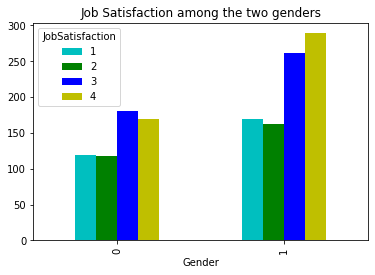

In [9]:
df_plot_Gen = df.groupby(['JobSatisfaction', 'Gender']).size().reset_index().pivot(columns = 'JobSatisfaction', index = 'Gender', values = 0)
df_plot_Gen.plot(kind = 'bar', color = ['c','g','b','y'],title="Job Satisfaction among the two genders")
plt.grid(False)
plt.show()

In [10]:
data0 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data0.info()
df=data0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
from sklearn.preprocessing import LabelEncoder
categorical = [
'BusinessTravel',
"Attrition",
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'StockOptionLevel',
 'WorkLifeBalance',
 'RelationshipSatisfaction',
 'PerformanceRating']
for c in categorical:
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)

In [12]:
data1=df
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
target=['Attrition']
datay=data1[target]
datax=data1.drop(target,axis=1)
additional = ['EmployeeNumber','EmployeeCount',"Attrition",'StandardHours','DailyRate','Over18',"HourlyRate","MonthlyRate"]
datax=data1.drop(additional,axis=1)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(datax,datay,test_size=0.2)
dtree_model = RandomForestClassifier().fit(X_train, y_train)
# dtree_predictions = dtree_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


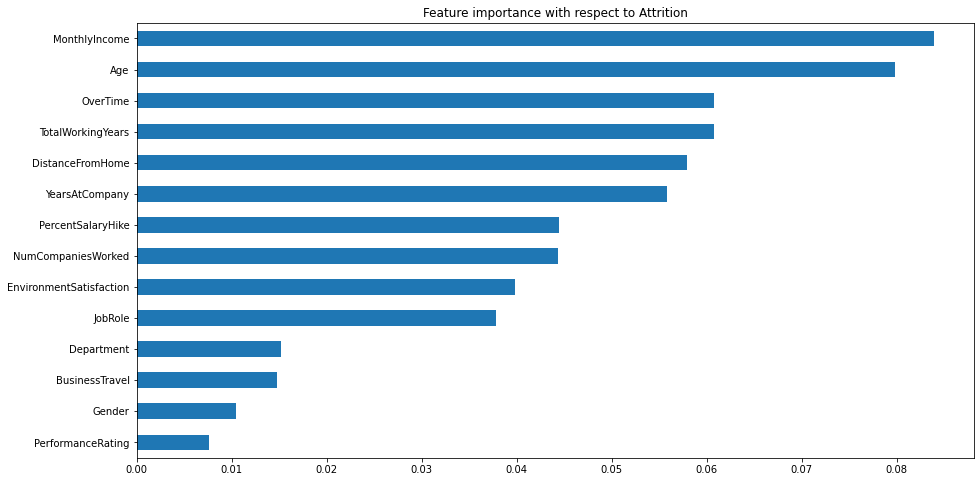

In [15]:
series1 = (pd.Series(dtree_model.feature_importances_, index=X_train.columns)
   .nlargest(10))
series2 = (pd.Series(dtree_model.feature_importances_, index=X_train.columns)
   .nsmallest(4))[::-1]
(pd.concat([series1, series2])
.plot(kind='barh',title="Feature importance with respect to Attrition",figsize=(15,8)).invert_yaxis())
plt.grid(False)
plt.savefig('Attrition_Feature_Importance.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


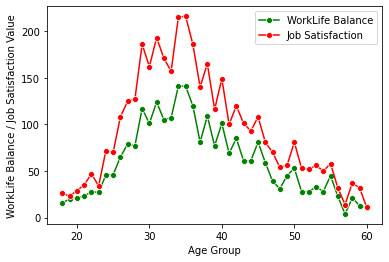

In [17]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
unique_age = df["Age"].unique()
job_satisfaction = []
worklife_balance = []
for i in unique_age:
    job_satisfaction.append(df[df["Age"]==i]["JobSatisfaction"].sum())
    worklife_balance.append(df[df["Age"]==i]["WorkLifeBalance"].sum())
x1 = unique_age
y1 = worklife_balance
sns.lineplot(x1, y1,color="green",marker="o")
x2 = unique_age
y2 = job_satisfaction
sns.lineplot(x2, y2,color="red",marker="o")
plt.legend(["WorkLife Balance",'Job Satisfaction'])
plt.xlabel('Age Group')
plt.ylabel('WorkLife Balance / Job Satisfaction Value')
plt.grid(False)
plt.rcParams['figure.facecolor'] = 'white'
plt.savefig('WOrkLife Balance vs Job Satisfaction.png')
plt.show()
